In [ ]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

In [ ]:
# Installing Pandas Profiler for automated detailed Exploratory Data Analysis - Google colabs is preferred
!pip install pandas-profiling --upgrade

     |████████████████████████████████| 256kB 7.8MB/s 
     |████████████████████████████████| 3.1MB 27.1MB/s 
     |████████████████████████████████| 10.1MB 40.8MB/s 
     |████████████████████████████████| 645kB 41.6MB/s 
     |████████████████████████████████| 112kB 47.8MB/s 
     |████████████████████████████████| 1.1MB 40.3MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 296kB 43.8MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=8d04312286f52f7f40cc0a80b9532c780d5019620d05963643b328298cb698ea
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=ccb8e0d745dd04624357ea8286394be4318e824b85fba7240f366010a13e739b
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERRO

In [ ]:
# This dataset contain both features and labels
df = pd.read_csv('/content/Comdined dataset SF.csv') #,index_col='Unnamed: 0'

In [ ]:
df.shape

(20000, 48)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20000 non-null  int64  
 1   hhld_id              20000 non-null  int64  
 2   drvr_cnt             20000 non-null  int64  
 3   veh_cnt              20000 non-null  int64  
 4   min_age              20000 non-null  float64
 5   hoh_age              20000 non-null  float64
 6   max_age              20000 non-null  float64
 7   avg_age              20000 non-null  float64
 8   min_mon_lic          20000 non-null  float64
 9   hoh_mon_lic          20000 non-null  float64
 10  max_mon_lic          20000 non-null  float64
 11  avg_mon_lic          20000 non-null  float64
 12  cnt_yth              20000 non-null  int64  
 13  cnt_female           20000 non-null  int64  
 14  cnt_male             20000 non-null  int64  
 15  cnt_married          20000 non-null 

> Missing Values


time_w_carr |----> 7010 (35.0%) missing values

prior_bi |-----> 7010 (35.0%) missing values

veh_lien_cnt |----> 19974 (99.9%) missing value

credit_score |-----> 921 (4.6%) missing values

In [ ]:
# Drop veh_lien_cnt  (99.9%) missing values
df.drop(['veh_lien_cnt'], axis=1, inplace=True)
df.shape

(20000, 47)

In [ ]:
# credit_score has <5% missing value.Impute with mean.
# First, obtaining the mean of credit_score
cds_mean=df['credit_score'].mean() 
round(cds_mean,3)

663.646

In [ ]:
# Second, replacing specific missing values with the above obtained Mean
df['credit_score'].fillna(cds_mean, inplace=True)
df.describe

<bound method NDFrame.describe of        Unnamed: 0  hhld_id  ...  not_at_fault_claims  future_clm_ind
0               0    15937  ...                  1.0               0
1               1    13778  ...                  0.0               0
2               2    16063  ...                  0.0               0
3               3    12789  ...                  0.0               0
4               4     5122  ...                  0.0               0
...           ...      ...  ...                  ...             ...
19995       19995     7971  ...                  0.0               0
19996       19996     5143  ...                  0.0               0
19997       19997     2554  ...                  1.0               0
19998       19998        6  ...                  0.0               0
19999       19999     4669  ...                  1.0               0

[20000 rows x 47 columns]>

In [ ]:
# time_w_carr - Time with current insurer has 35% missing value. Impute with Median

df['time_w_carr'] = df['time_w_carr'].fillna(df['time_w_carr'].median())

In [ ]:
# prior_bi -  Bodily Injury Coverage Individual Limit with current insurer  has 35% missing value. Impute with Median

df['prior_bi'] = df['prior_bi'].fillna(df['prior_bi'].median())

In [ ]:
# Checking the null values list and counts
df.isnull().sum()

Unnamed: 0             0
hhld_id                0
drvr_cnt               0
veh_cnt                0
min_age                0
hoh_age                0
max_age                0
avg_age                0
min_mon_lic            0
hoh_mon_lic            0
max_mon_lic            0
avg_mon_lic            0
cnt_yth                0
cnt_female             0
cnt_male               0
cnt_married            0
cnt_single             0
hoh_married            0
cnt_auto               0
cnt_mtrcyc             0
avg_majr_viol          0
cnt_majr_viol          0
cnt_minr_viol          0
avg_minr_viol          0
cnt_lic_susp           0
curnt_insurer          0
time_w_carr            0
inforce_ind            0
prior_bi               0
fire_ind               0
homeowner_ind          0
veh_lease_cnt          0
veh_own_cnt            0
monthly_pay_ind        0
veh_w_coll_cnt         0
veh_w_comp_cnt         0
veh_w_ers_cnt          0
curnt_bi_low           0
curnt_bi_upp           0
credit_score           0


In [ ]:
df.head(2)

Unnamed: 0  hhld_id  ...  not_at_fault_claims  future_clm_ind
0           0    15937  ...                  1.0               0
1           1    13778  ...                  0.0               0

[2 rows x 47 columns]

In [ ]:

df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.shape

(20000, 46)

In [ ]:
df.head(2)

hhld_id  drvr_cnt  ...  not_at_fault_claims  future_clm_ind
0    15937         2  ...                  1.0               0
1    13778         1  ...                  0.0               0

[2 rows x 46 columns]

In [ ]:
# Export cleaned dataset that combines all 3 sets into one with 20k observations and 46 features
df.to_csv('Cleaned_Dataset_SF.csv')

In [ ]:
# Exploratory Data Analysis using latest AI based AutoEDA Package - sweetviz
!pip install sweetviz

     |████████████████████████████████| 15.1MB 226kB/s 
     |████████████████████████████████| 81kB 11.8MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
# Importing the package for use
import sweetviz as sv

# Generate the EDA report
Employee_EDA_report = sv.analyze(df)
# Convert the report to HTML 
Employee_EDA_report.show_html('SWEETVIZ_REPORT_STATE_FARM.html') # Default arguments will generate to "SWEETVIZ_REPORT_STATE_FARM.html"

# Downloading the EDA report to local machine
from google.colab import files
files.download('SWEETVIZ_REPORT_STATE_FARM.html')

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT_STATE_FARM.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Build profile report to find noise variables and do qualitative cleaning 
from pandas_profiling import ProfileReport

In [ ]:
PP_Claim_EDA_Report=ProfileReport(df,minimal=True) # generating profile report

In [ ]:
# Convert it to html
PP_Claim_EDA_Report.to_file('SF_EDA_PANDAS.html')

Summarize dataset:   0%|          | 0/54 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [58]:
!pip install Autoviz --upgrade # 

Requirement already up-to-date: Autoviz in /usr/local/lib/python3.7/dist-packages (0.0.81)


In [62]:
df1 = pd.read_csv('/content/Cleaned_Dataset_SF.csv')
df1.head()

Unnamed: 0  hhld_id  ...  not_at_fault_claims  future_clm_ind
0           0    15937  ...                  1.0               0
1           1    13778  ...                  0.0               0
2           2    16063  ...                  0.0               0
3           3    12789  ...                  0.0               0
4           4     5122  ...                  0.0               0

[5 rows x 47 columns]

In [60]:
from autoviz.AutoViz_Class import AutoViz_Class # import modeule to create an instance of the class
AV=AutoViz_Class() # assign to local variable

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [74]:
# Feature Selection removed 

df_model =df1[['drvr_cnt', 'min_age', 'max_age', 'min_mon_lic', 'max_mon_lic','cnt_yth', 
               'cnt_female', 'cnt_male', 'cnt_married', 'cnt_single','cnt_auto', 'cnt_mtrcyc', 
               'cnt_majr_viol', 'cnt_minr_viol','cnt_lic_susp', 'time_w_carr', 'inforce_ind', 
               'fire_ind','homeowner_ind','veh_lease_cnt', 'veh_own_cnt', 'monthly_pay_ind','veh_w_coll_cnt', 'veh_w_comp_cnt', 
               'veh_w_ers_cnt', 'curnt_bi_upp','credit_score', 'premium', 'fault_claims', 
               'not_at_fault_claims','future_clm_ind']]


File encoding decoder utf-8 does not work for this file
File encoding decoder iso-8859-11 does not work for this file
File encoding decoder cpl252 does not work for this file
File encoding decoder latin1 does not work for this file
Shape of your Data Set: (20000, 31)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 20000 rows, 30 cols
Data Set columns info:
* drvr_cnt: 0 nulls, 4 unique vals, most common: {1: 11461, 2: 6822}
* min_age: 0 nulls, 15556 unique vals, most common: {16.0: 1237, 41.732: 6}
* max_age: 0 nulls, 16047 unique vals, most common: {16.0: 550, 46.27: 5}
* min_mon_lic: 0 nulls, 18396 unique vals, most common: {0.0: 1269, 258.387: 3}
* max_mon_lic: 0 nulls, 18810 unique vals, most common: {0.0: 593, 585.693: 3}
* cnt_yth: 0 nulls, 4 unique vals, most common: {0: 18371, 1: 1529}
* cnt_female: 0 nulls, 5 unique vals, most common: {1: 9739, 0: 7597}
* cnt_male: 0 nulls, 5 unique vals, most c

inforce_ind  credit_score  ...  veh_lease_cnt  future_clm_ind
0                1       825.949  ...              0               0
1                1       684.650  ...              0               0
2                1       596.318  ...              0               0
3                1       636.758  ...              0               0
4                1       669.570  ...              0               0
...            ...           ...  ...            ...             ...
19995            0       730.525  ...              0               0
19996            1       733.680  ...              0               0
19997            1       689.594  ...              0               0
19998            0       682.153  ...              0               0
19999            1       732.307  ...              0               0

[20000 rows x 23 columns]

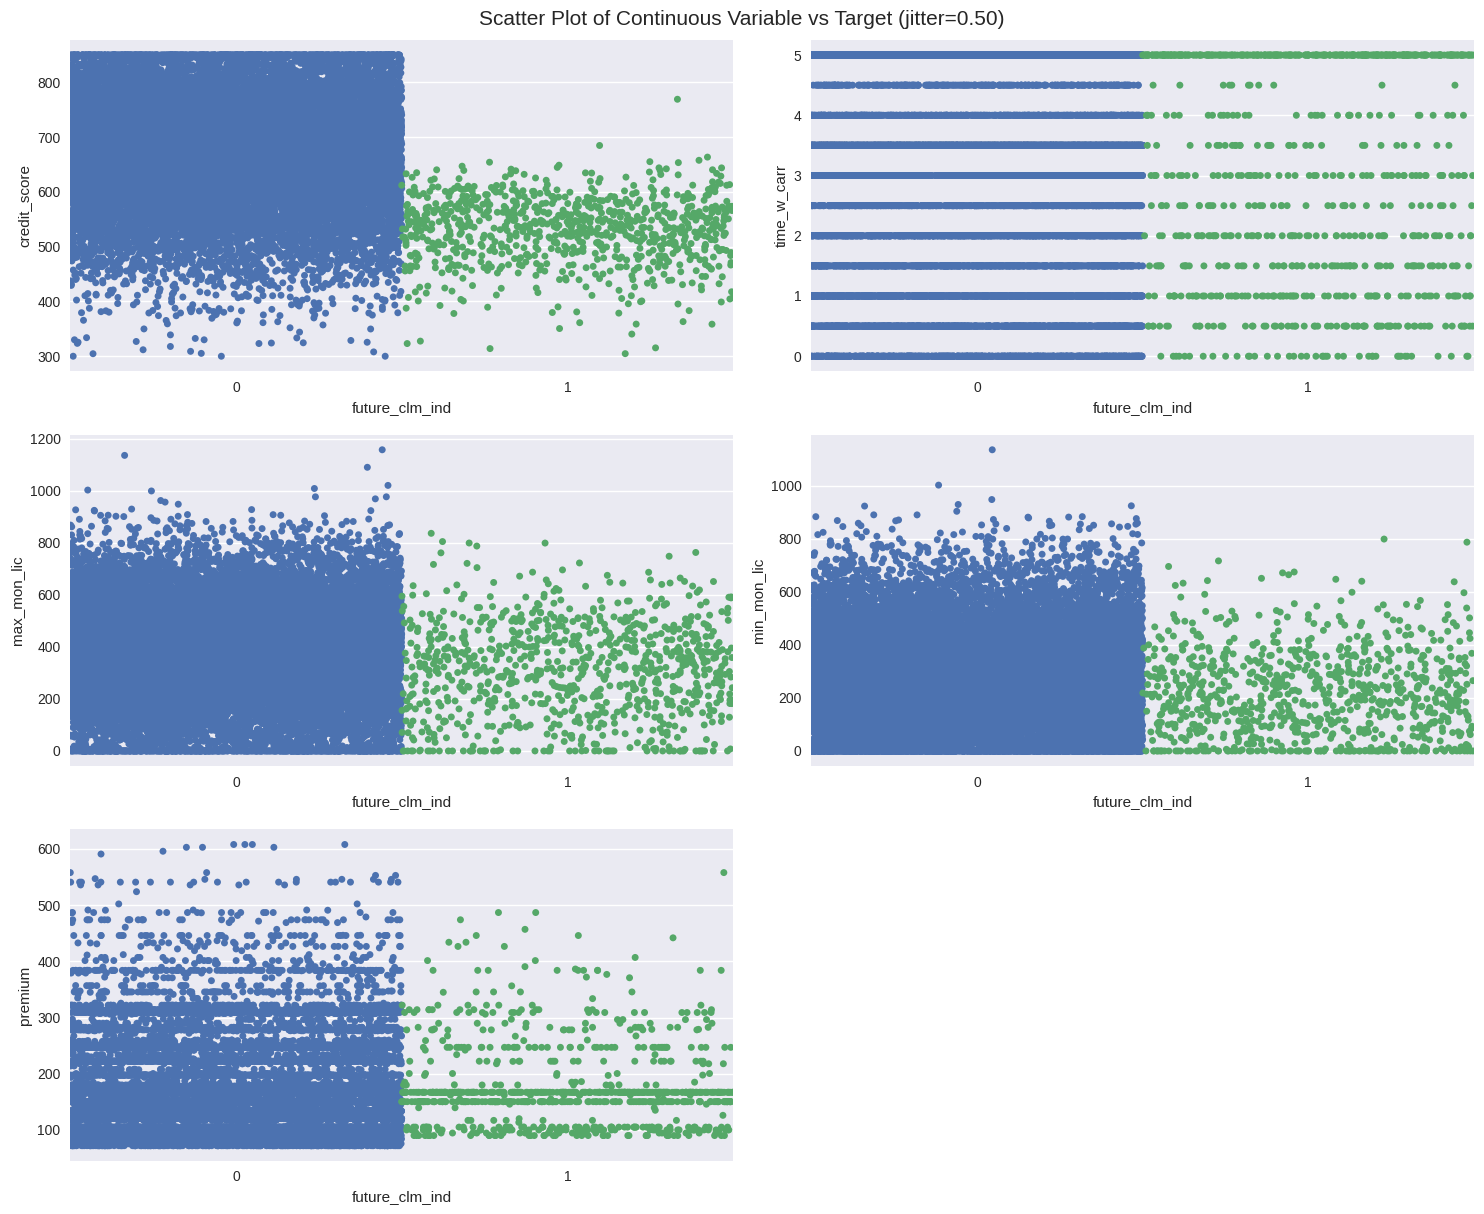

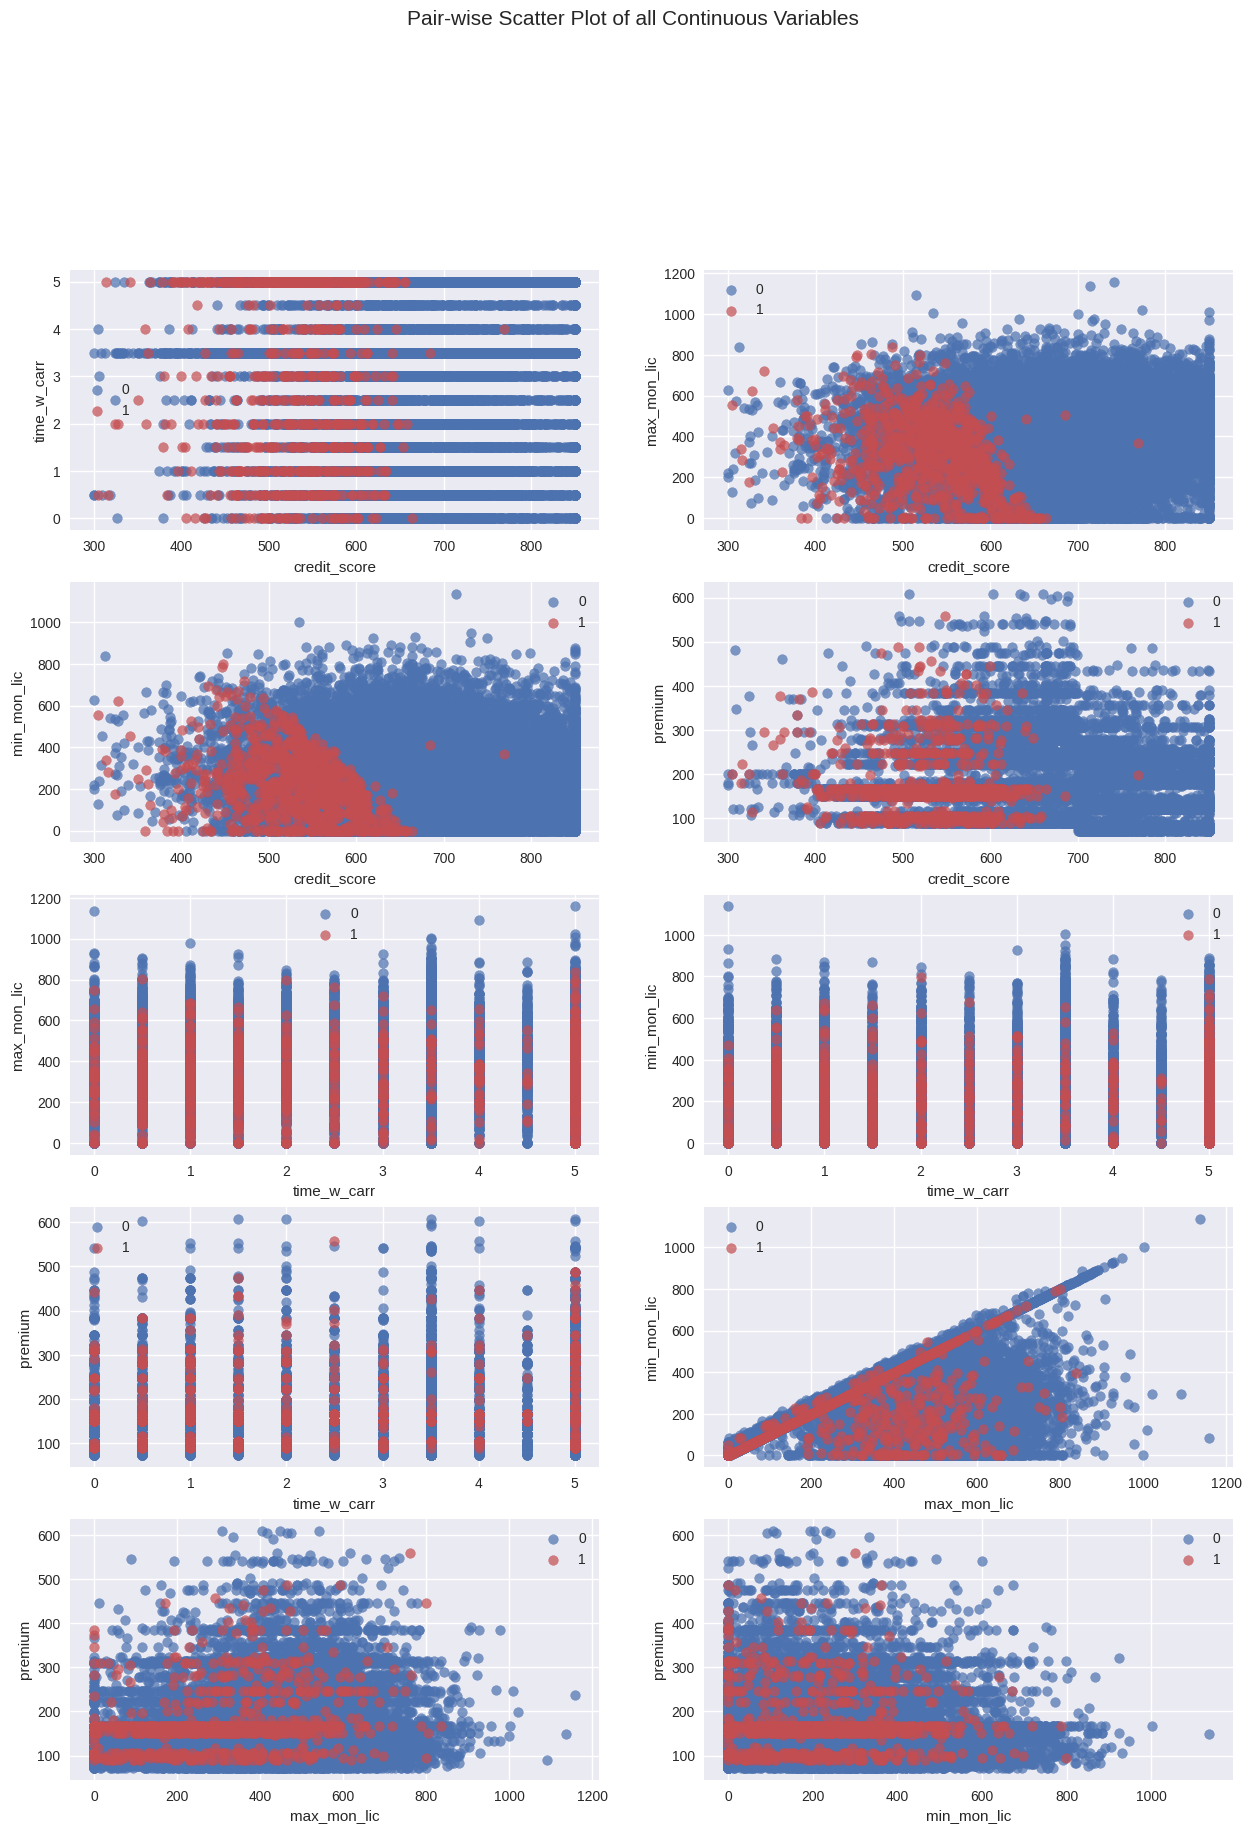

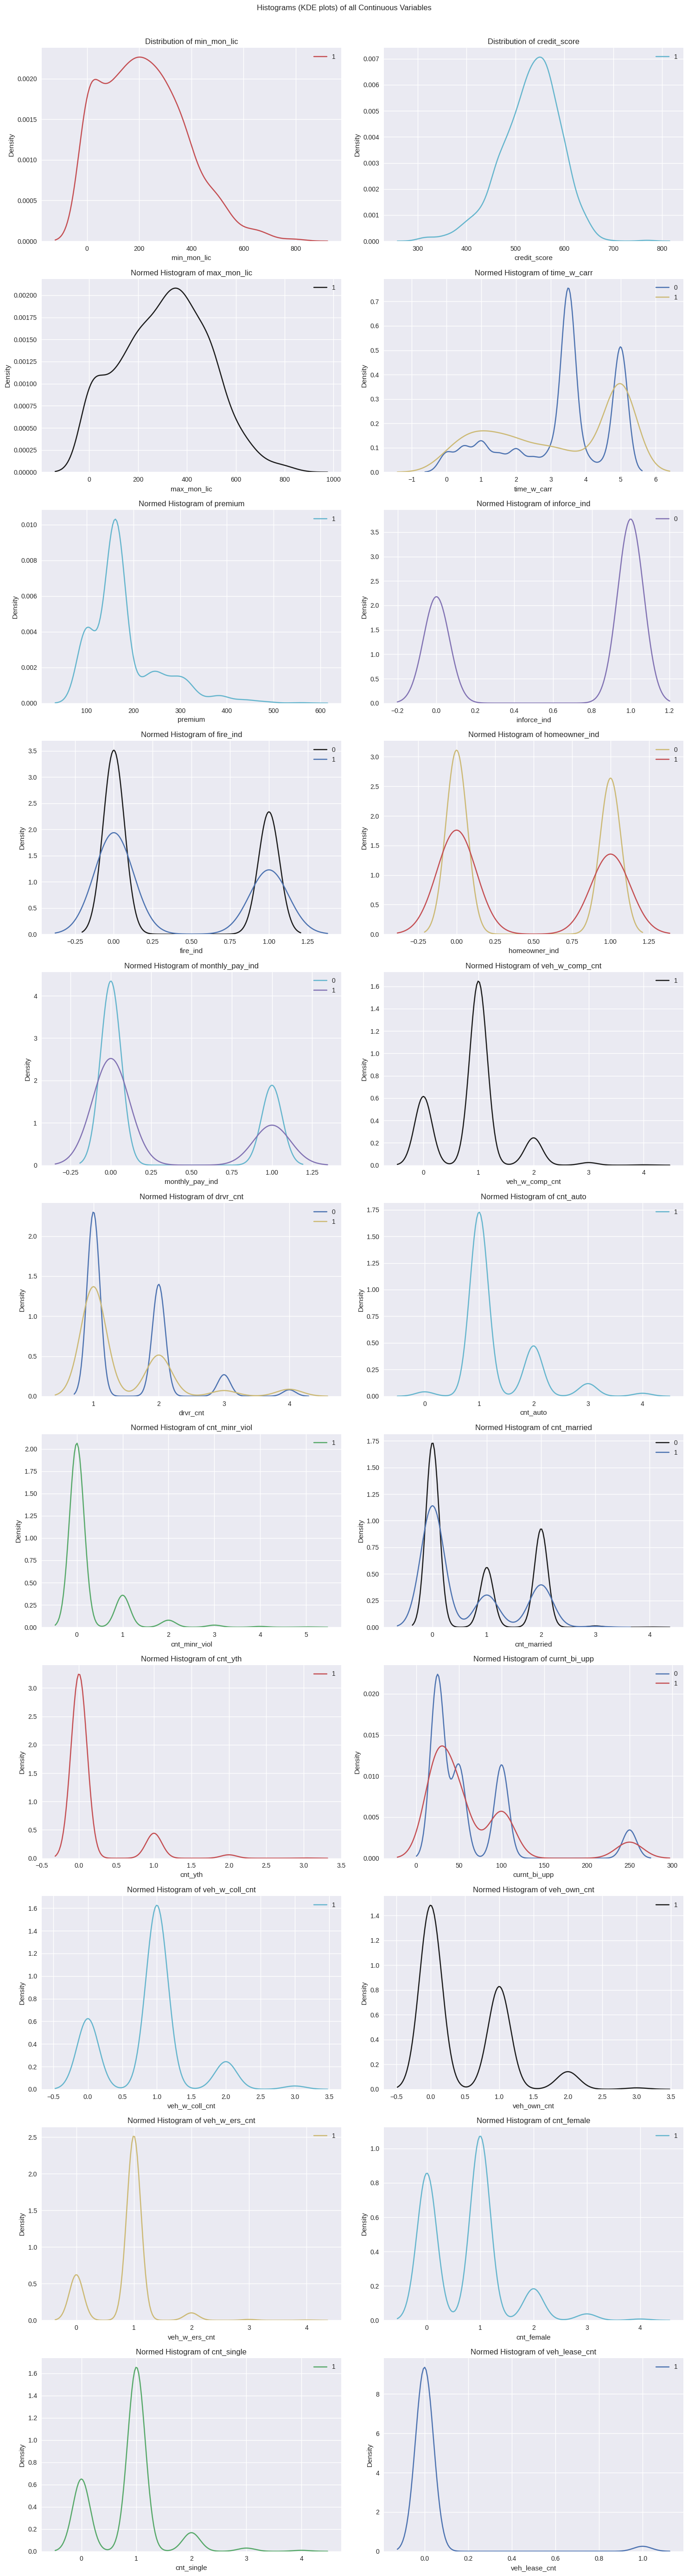

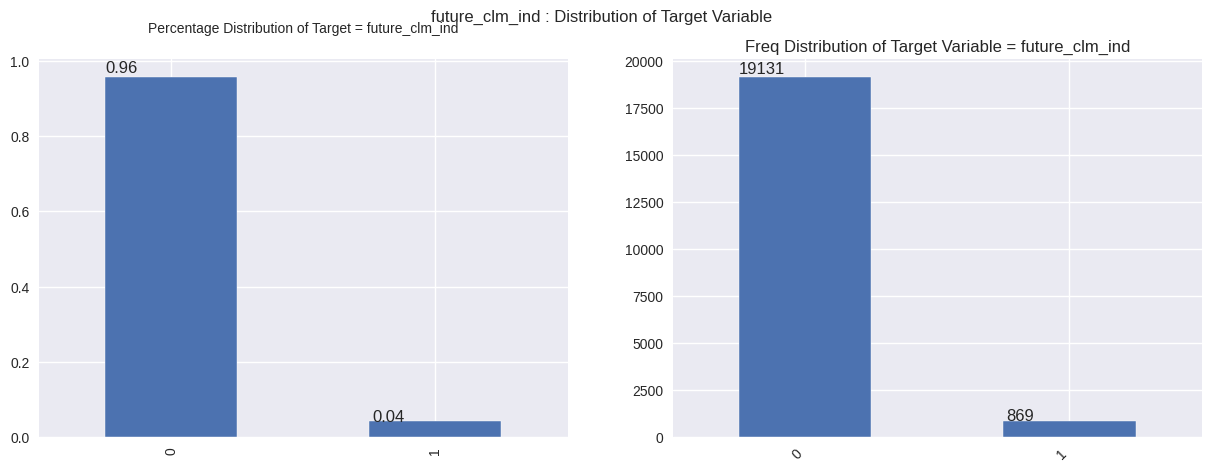

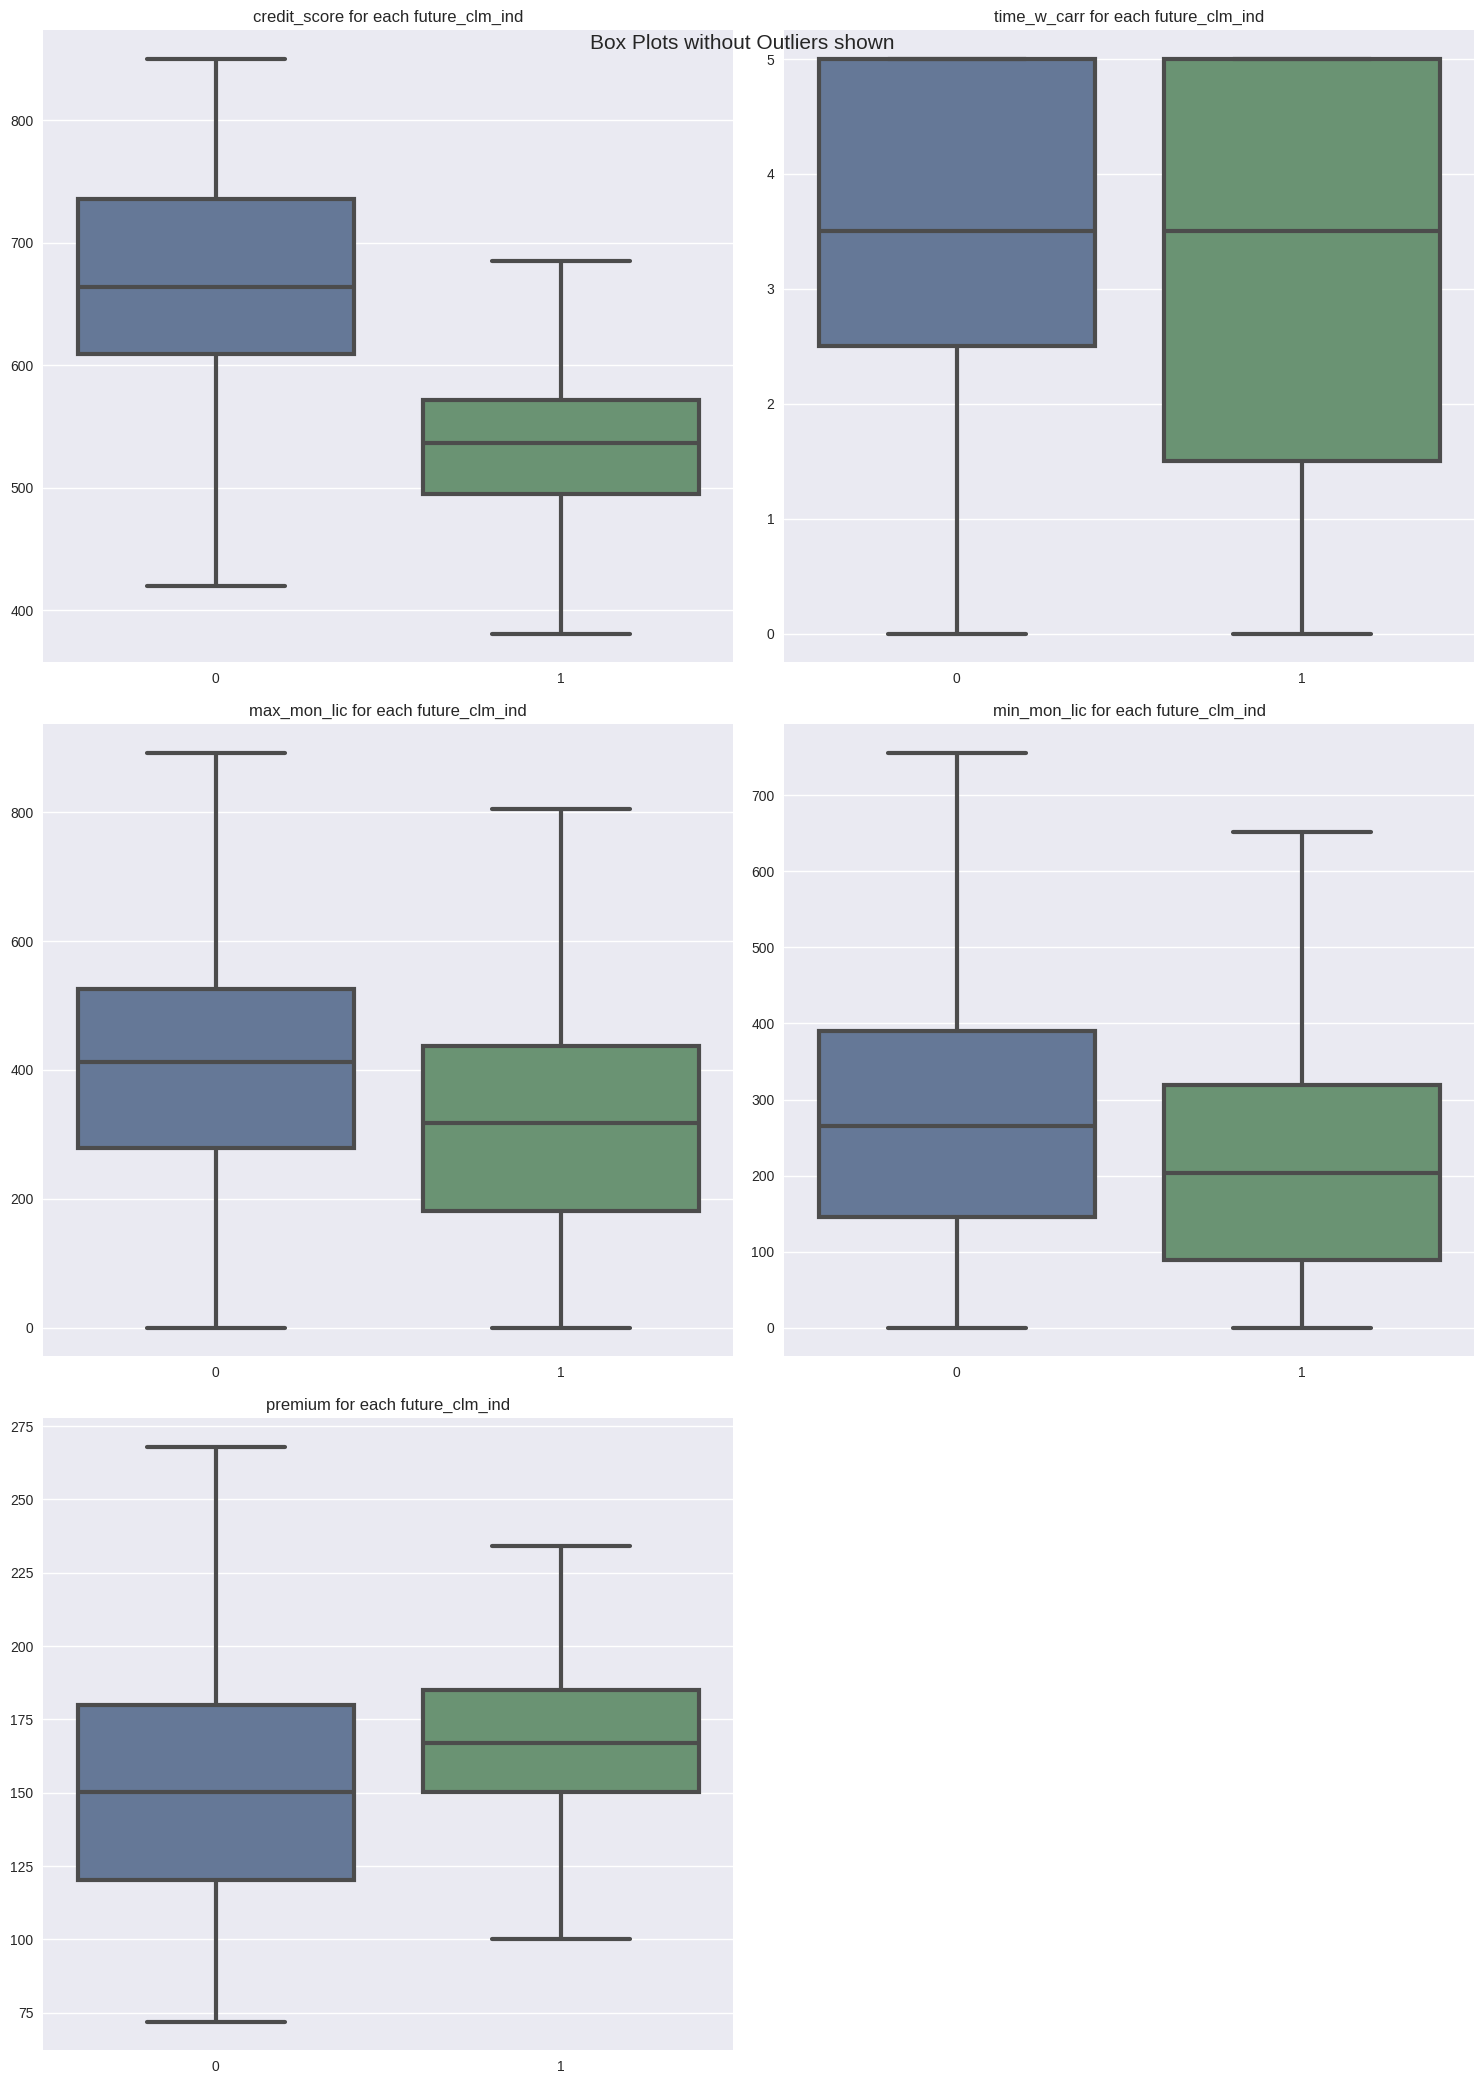

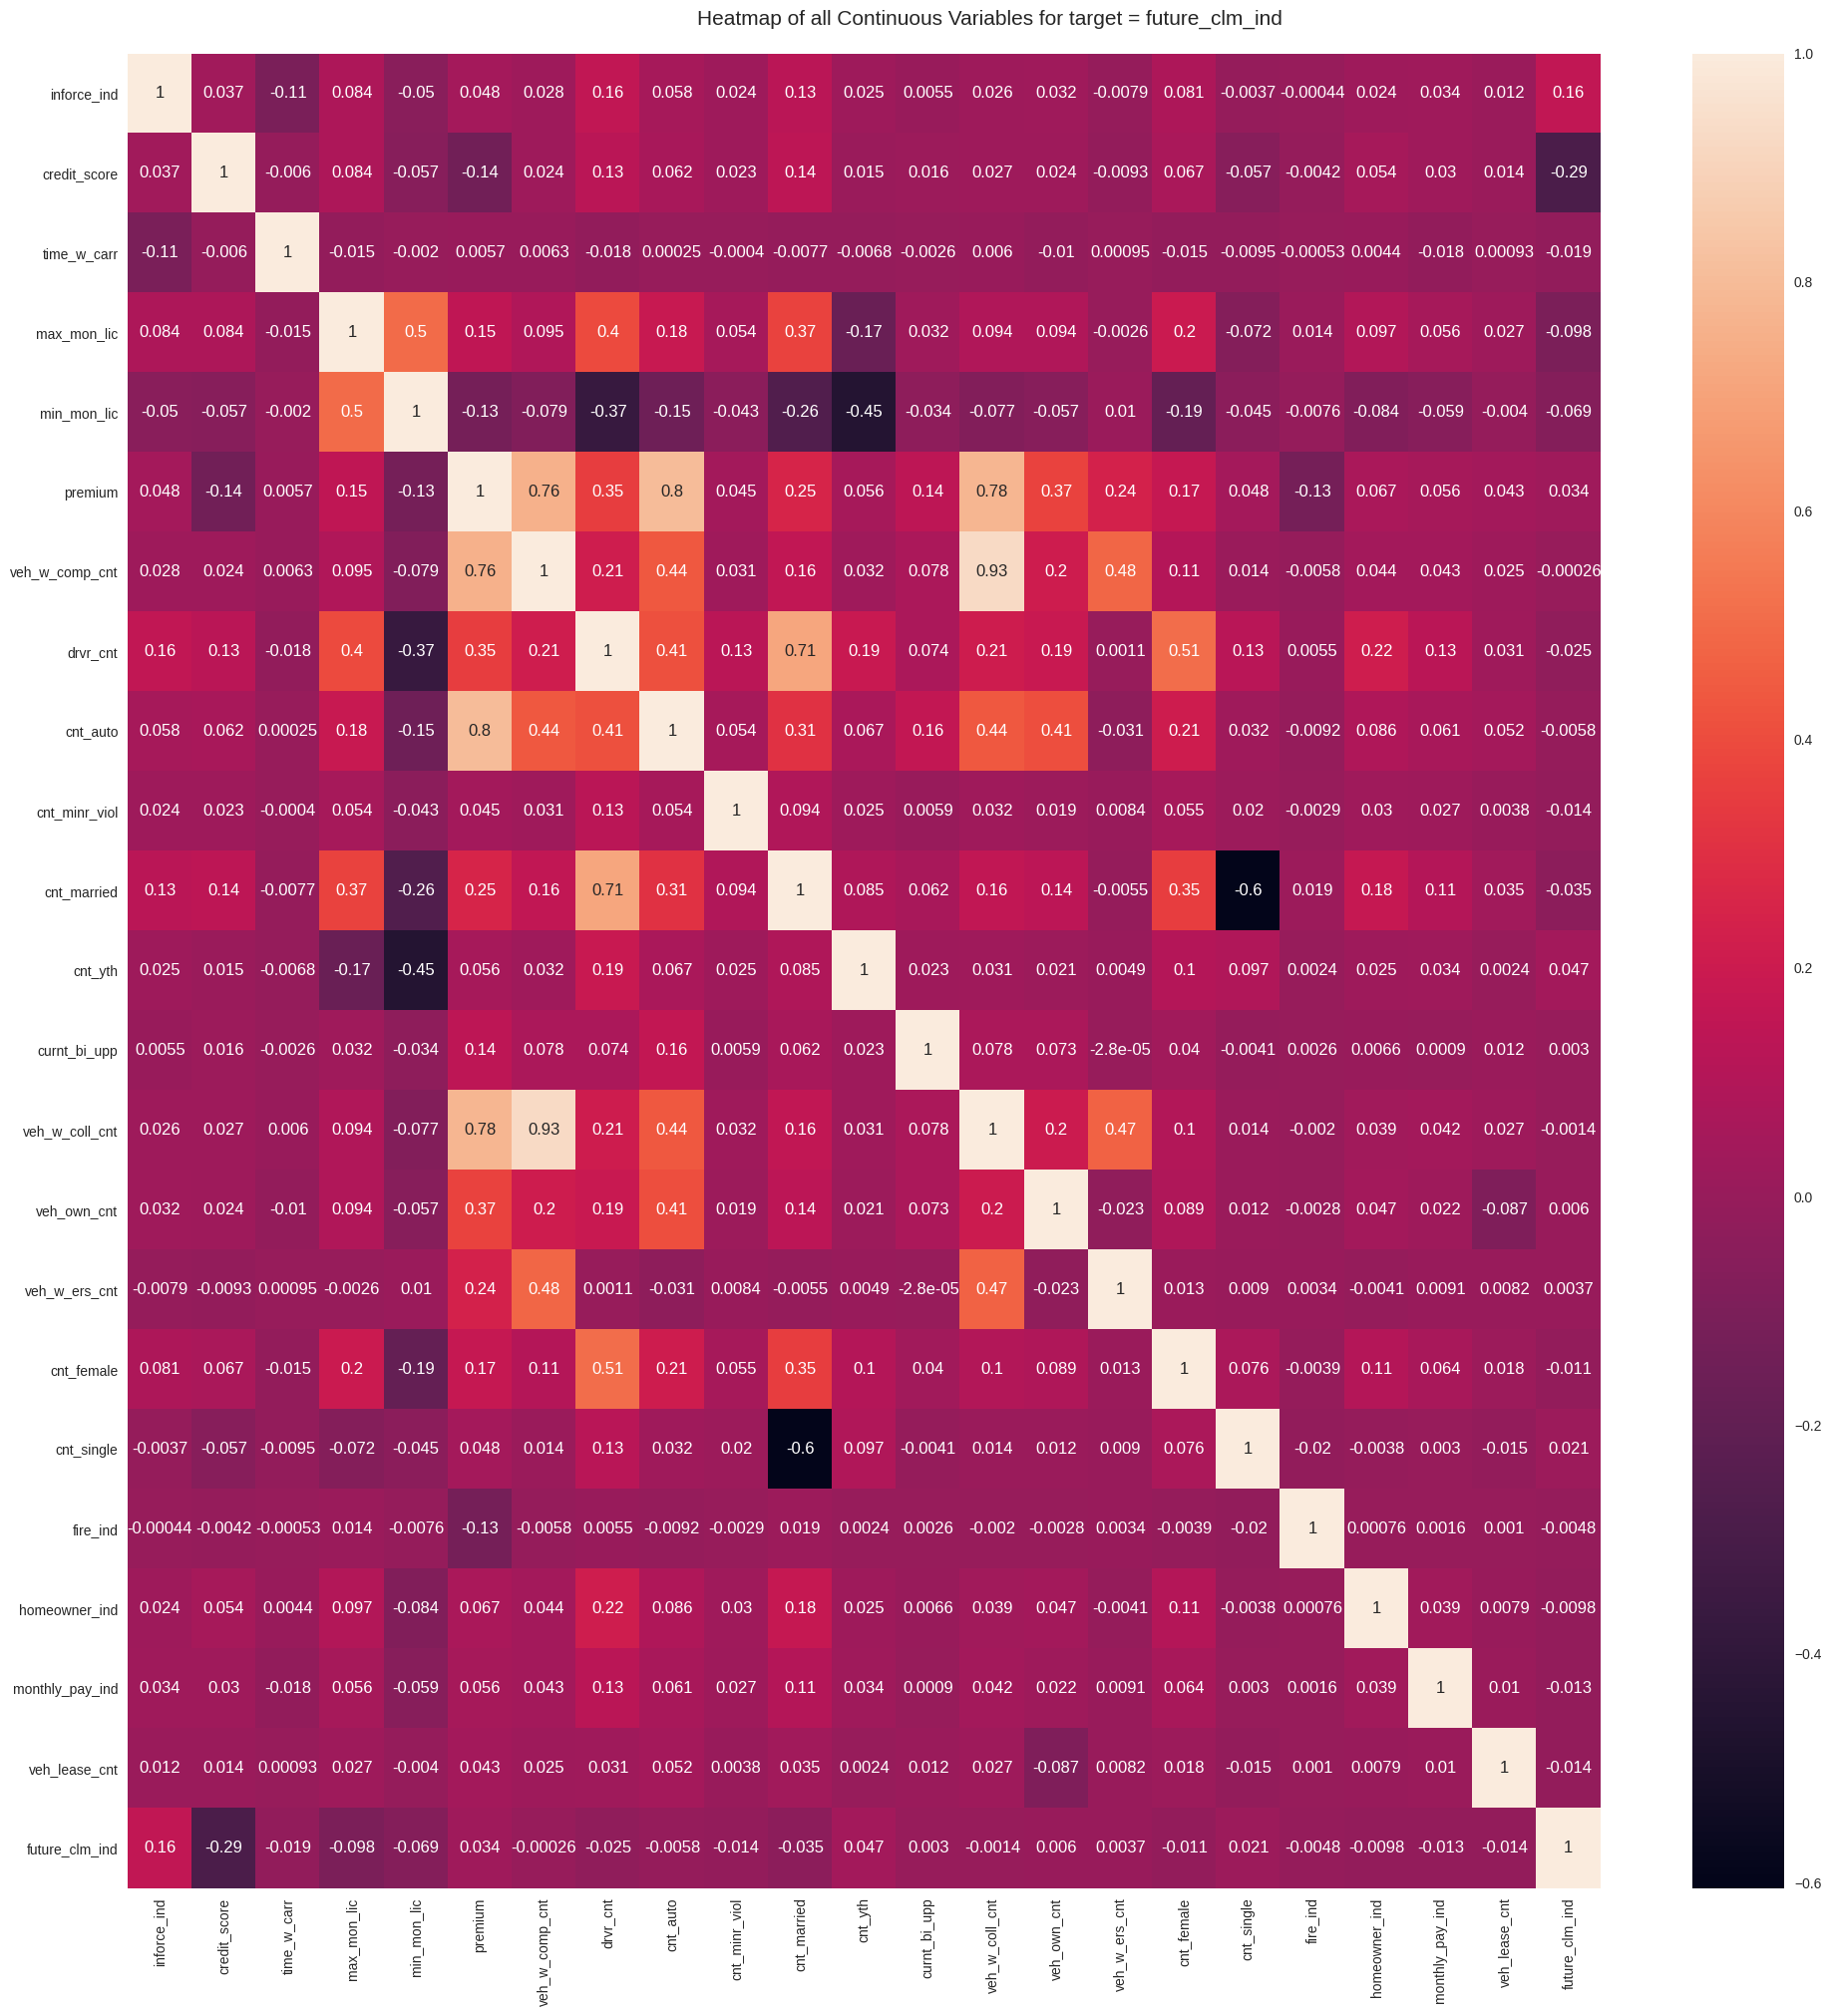

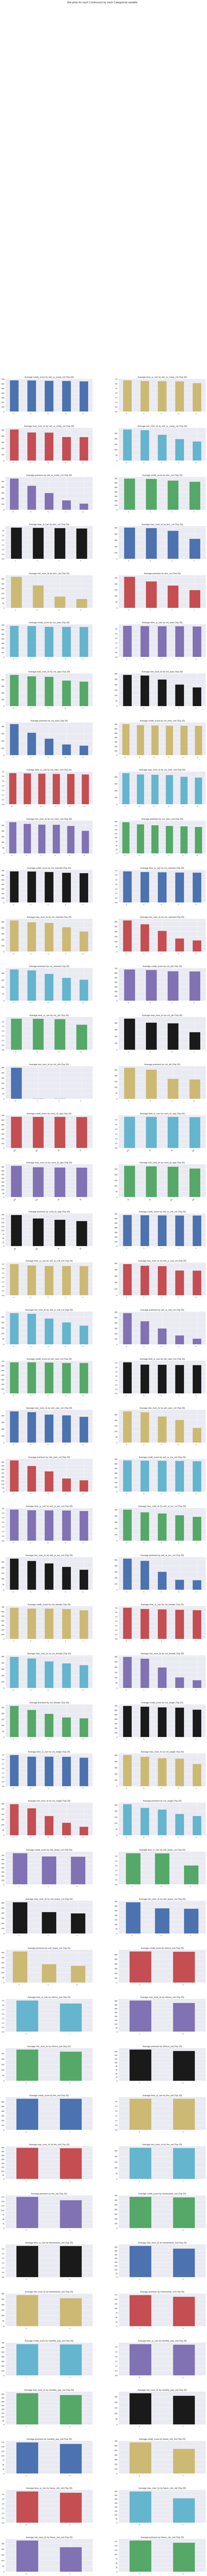

In [75]:
# Pass the datamodel and view plots
AV.AutoViz("Combind plot after feature reduction_AV",dfte=df_model,verbose=2 ,depVar='future_clm_ind')

In [76]:
# Generate new dataframe for heat map only
df_model1=df_model.corr().round(3)
df_model1.describe

<bound method NDFrame.describe of                      drvr_cnt  min_age  ...  not_at_fault_claims  future_clm_ind
drvr_cnt                1.000   -0.371  ...               -0.006          -0.025
min_age                -0.371    1.000  ...                0.000          -0.068
max_age                 0.391    0.507  ...               -0.005          -0.098
min_mon_lic            -0.369    0.998  ...                0.000          -0.069
max_mon_lic             0.397    0.498  ...               -0.005          -0.098
cnt_yth                 0.191   -0.452  ...               -0.008           0.047
cnt_female              0.507   -0.192  ...               -0.003          -0.011
cnt_male                0.491   -0.178  ...               -0.003          -0.015
cnt_married             0.713   -0.266  ...               -0.001          -0.035
cnt_single              0.127   -0.045  ...               -0.006           0.021
cnt_auto                0.413   -0.153  ...               -0.004          -

In [80]:
# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

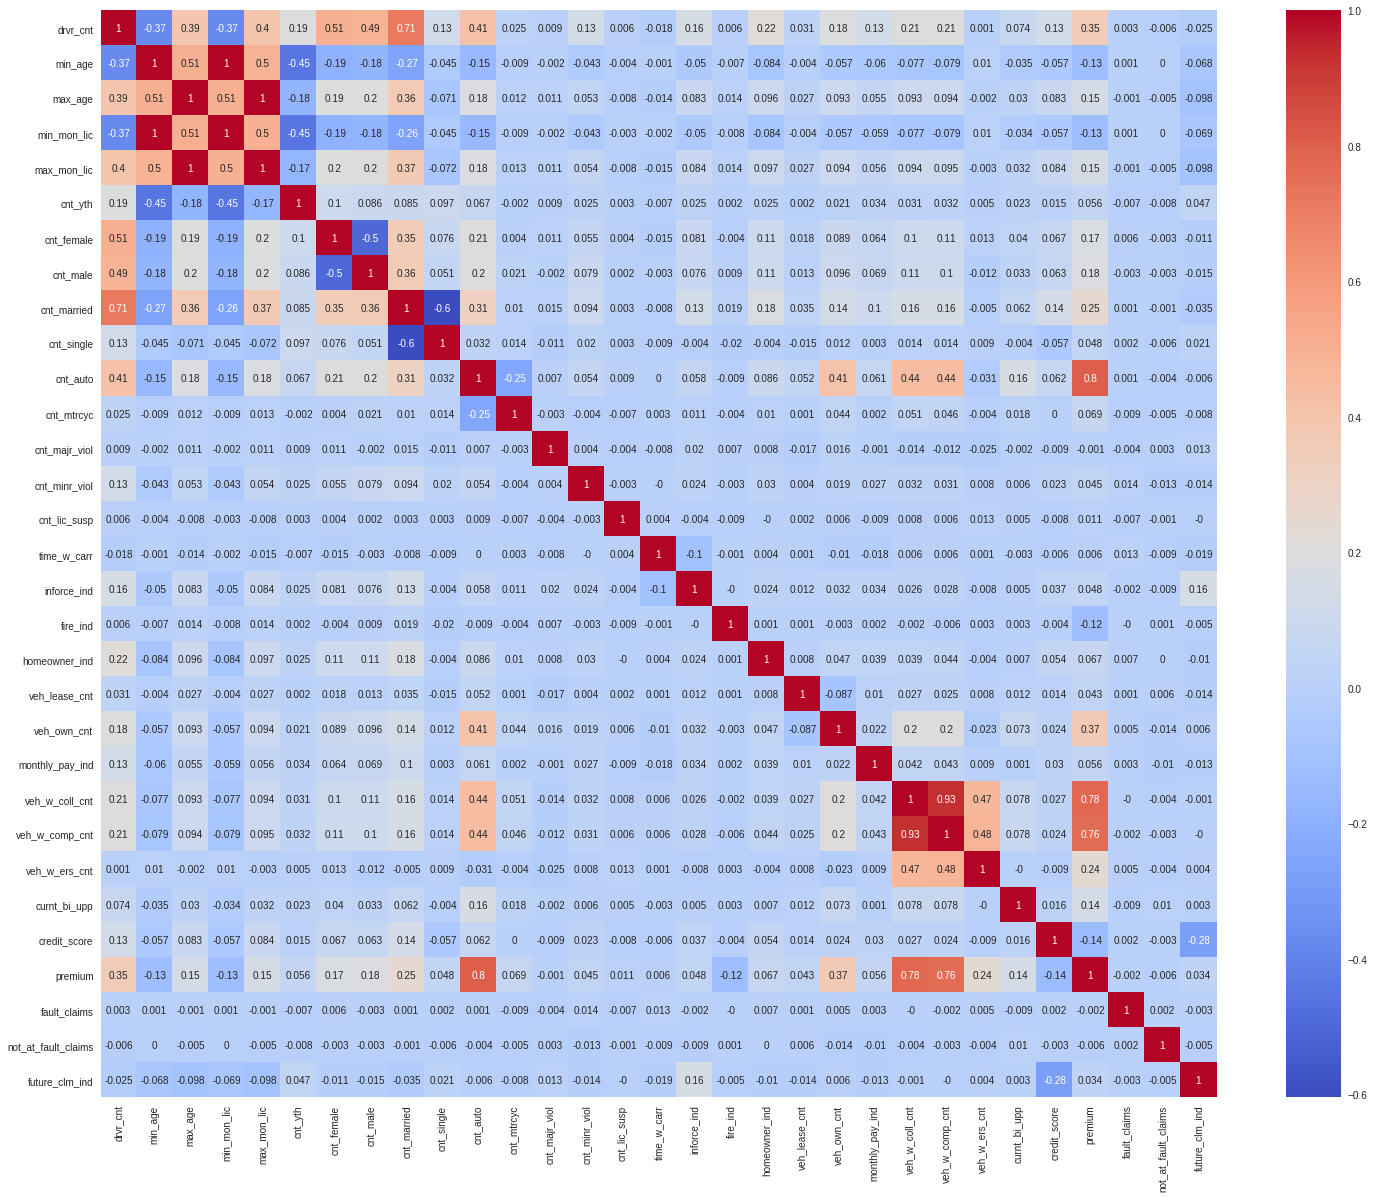

In [81]:
plt.figure(figsize=(25,20))  # Draw the figure
sns.heatmap(df_model1,cmap='coolwarm',annot=True)
plt.show()